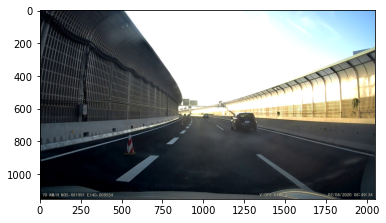

In [3]:
import math
import numpy as np
from PIL import Image
pi = np.pi
import cv2
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

img = cv2.imread("C:/Users/mwand/OneDrive/Documents/tview/roaddd.png")
rows, cols, channels = img.shape

#opencv using BGR so change to RGB to plot in matplotlib
b, g, r = cv2.split(img) #plotting of matplotlib is rgb
img = cv2.merge([r, g, b])
plt.imshow(img)
plt.show()

In [1]:
scale = 1

width = int(img.shape[1] * scale)
height = int(img.shape[0] * scale)
dimensions = (width, height)
img = cv2.resize(img, dimensions, cv2.INTER_AREA) 
rows, cols, channels = img.shape
plt.imshow(img)
plt.show()

NameError: name 'img' is not defined

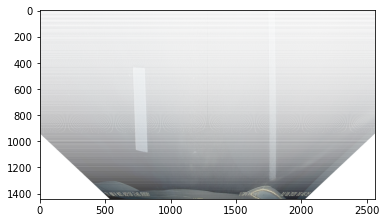

In [24]:
#TopView Transformation 2
#referenced from the C++ code on the website
#https://daily-tech.hatenablog.com/entry/2016/05/29/133511
#scale = 1
Hvc = 5 #Height of the Virtual Camera
Hc = 1.5 #Height of Camera
Dvc = 2.5 #Horizontal distance of Vc to camera
f = 1025 #focal length?
fp = f
theta = (31.0/180.0)*pi

s = np.sin(theta)
c = np.cos(theta)

#original image resolution
cx = cols*scale
cy = rows*scale

#transformed image resolution
cxp = cols*scale
cyp = rows*scale

top_img = np.zeros((int(cyp/scale),int(cxp/scale),3), np.uint8)
top_img.fill(255)

points = []
values_red = []
values_green = []
values_blue = []

for y in range(rows-1):
    for x in range(cols-1):
        
        xOrg = x - cx/2
        yOrg = -y + cy
        
        newX = int((fp/Hvc)*((Hc * xOrg)/(f * s - yOrg * c)))
        newY = int((fp/Hvc)*((Hc*(f * c + yOrg * s)/(f * s - yOrg * c)) - Dvc))
        
        newX = int((newX + int(cxp/2)/scale))
        newY = int((-newY + cyp)/scale)
    
        if newX < 0 or cxp/scale - 1 < newX or newY < 0 or cyp/scale - 1 < newY:
            continue
        
        top_img[newY,newX] = img[y,x] #img[y,x] 
        
        a = np.array([newY, newX])
        
        points.append(a)
        values_red.append(img[y,x][0])
        values_green.append(img[y,x][1])
        values_blue.append(img[y,x][2])
        #print(img[y,x][0])
        #print(a)
        
plt.imshow(top_img)
plt.show()

points = np.array(points)
values_red = np.array(values_red)
values_green = np.array(values_green)
values_blue = np.array(values_blue)

#def func(x, y):
#    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
#grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
#points = np.random.rand(1000, 2)
#values = func(points[:,0], points[:,1])


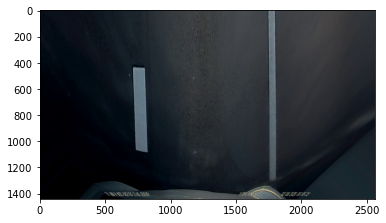

(1440, 2560, 3)


In [25]:
grid_x, grid_y = np.mgrid[0:rows:1, 0:cols:1]
grid_red = griddata(points, values_red, (grid_x, grid_y), method='nearest')
grid_green = griddata(points, values_green, (grid_x, grid_y), method='nearest')
grid_blue = griddata(points, values_blue, (grid_x, grid_y), method='nearest')

grid_total = cv2.merge([grid_red, grid_green, grid_blue])

#plt.imshow(interp)#, extent=(0,cols,0,rows), origin='lower')
plt.imshow(grid_total)#, extent=(0,1,0,1), origin='upper')
#plt.imshow(grid_green)
#plt.gcf().set_size_inches(6, 6)
plt.show()
#print(grid_total)
print(grid_total.shape)

In [6]:
grid_x

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.001001, 0.001001, 0.001001, ..., 0.001001, 0.001001, 0.001001],
       [0.002002, 0.002002, 0.002002, ..., 0.002002, 0.002002, 0.002002],
       ...,
       [0.997998, 0.997998, 0.997998, ..., 0.997998, 0.997998, 0.997998],
       [0.998999, 0.998999, 0.998999, ..., 0.998999, 0.998999, 0.998999],
       [1.      , 1.      , 1.      , ..., 1.      , 1.      , 1.      ]])

In [8]:
print(points)

[[  7   1]
 [  7   3]
 [  7   4]
 ...
 [799 631]
 [799 632]
 [799 632]]


In [38]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
#print(grid_x)
print(grid_x.shape)
print(grid_y.shape)

(100, 200)
(100, 200)


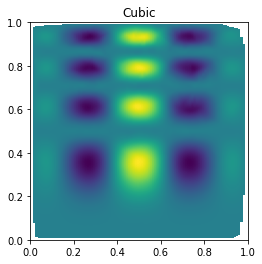

[[1.26632257e-08 1.26632257e-08 1.26632257e-08 ... 1.91769151e-03
  1.91769151e-03 1.55121452e-03]
 [1.26632257e-08 1.26632257e-08 1.26632257e-08 ... 1.55121452e-03
  1.55121452e-03 1.55121452e-03]
 [1.26632257e-08 1.26632257e-08 1.26632257e-08 ... 1.55121452e-03
  1.55121452e-03 1.55121452e-03]
 ...
 [9.86722684e-07 9.86722684e-07 9.86722684e-07 ... 1.04202105e-02
  1.04202105e-02 1.04202105e-02]
 [9.86722684e-07 9.86722684e-07 9.86722684e-07 ... 1.04202105e-02
  1.04202105e-02 1.04202105e-02]
 [9.86722684e-07 9.86722684e-07 9.86722684e-07 ... 1.04202105e-02
  1.04202105e-02 1.04202105e-02]]


In [36]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
'''plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
'''
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

print(grid_z0)

In [29]:
print(grid_z0.shape)

(100, 200)


In [12]:
print(values)

[-2.43509942e-02 -1.84442443e-06 -4.52798091e-03  2.62768862e-02
  3.48929385e-03 -1.24251824e-01 -2.97548271e-02  2.43864603e-01
 -1.04070848e-01  2.09075046e-03 -1.17301291e-01 -4.85567978e-03
 -1.35519129e-02 -1.12286462e-01  4.10113783e-03  4.13489652e-04
 -1.01736953e-02 -5.40443259e-02 -1.06212518e-02  3.87261404e-02
 -5.47649700e-04 -1.17324438e-05  2.26506508e-02 -3.51769132e-06
  1.88639134e-01 -1.06468057e-01  2.06498138e-02  7.17523831e-02
  2.23349940e-02  1.11784501e-03  6.64580297e-05  7.43762415e-04
 -1.11248039e-01  2.88448221e-02 -2.90796443e-02  1.31046505e-03
  3.66015708e-03  2.17426012e-02  2.74778398e-04  2.24498592e-02
  6.61483836e-03  1.35302237e-02 -2.30563951e-02  1.52072753e-01
 -1.17431661e-01  2.47979176e-02  2.39081390e-02 -8.72746138e-03
  7.53446766e-04 -7.48064613e-02 -4.60265775e-05  1.02033454e-02
 -4.13301764e-04 -2.17052098e-02 -4.53956801e-05 -1.60511222e-02
  1.36698637e-02 -5.56626254e-02 -7.08255466e-03 -8.60550956e-03
  1.35265170e-01  1.71543